Image 10A:
Original image shape: (1105, 1105)
Image 12A:
Original image shape: (1105, 1105)
Image 14A:
Original image shape: (1105, 1105)
Image 16A:
Original image shape: (1105, 1105)
Image 18A:
Original image shape: (1105, 1105)
Image 20A:
Original image shape: (1105, 1105)


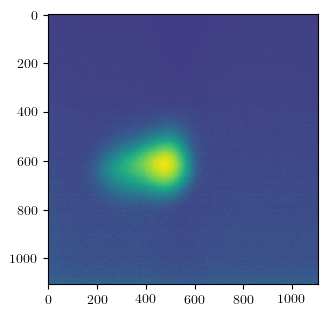

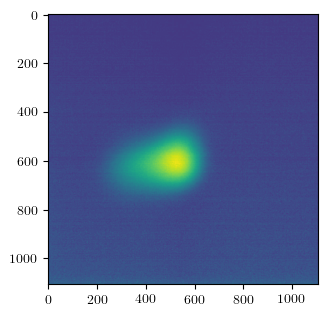

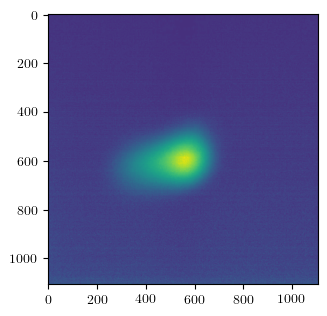

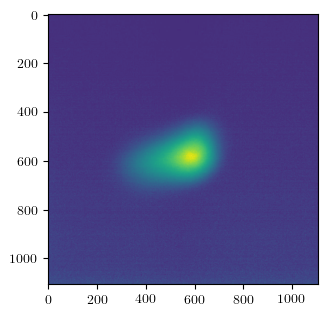

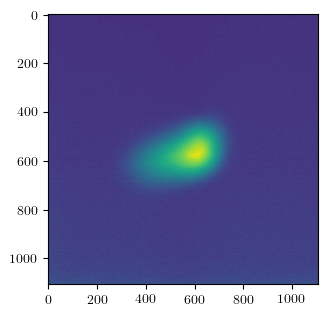

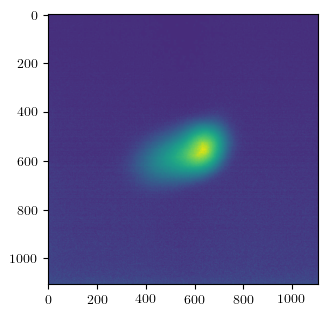

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_dict = {}

for i in range(10,22,2):
    image_name = f"{i}A"
    print(f"Image {image_name}:")

    # Load the PNG image
    image = Image.open(f'{i}A.jpg').crop((324, 175, 1429, 1280)).convert("L") # ((left, upper, right, lower))

    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Store the image array in the dictionary with the dynamic name as the key
    image_dict[image_name] = image_array

    # Display the original image and its shape
    plt.figure()
    plt.imshow(image_array)
    print("Original image shape:", image_array.shape)



# 250427 Now plotting them side by side 5 column

In [24]:
# copy paste this code to the beginning of your script to set the plotting style for a two column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    # "figure.constrained_layout.use": True
})

plt.rcParams["figure.autolayout"] = False # set to True if you want to use constrained_layout

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,7.5)
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markeredgewidth"] = 0.7
plt.rcParams["lines.markersize"] = 4 #data point size

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = False
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

Image 10A:
Image shape: (1105, 1105)
Image 12A:
Image shape: (1105, 1105)
Image 14A:
Image shape: (1105, 1105)
Image 16A:
Image shape: (1105, 1105)
Image 18A:
Image shape: (1105, 1105)
Image 20A:
Image shape: (1105, 1105)


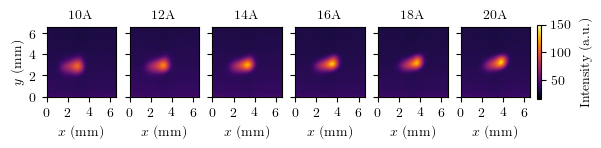

In [39]:
cmap = 'inferno'

# plot five figures side by side
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6,sharex=True, sharey=True, constrained_layout=True)

pixel_size_um = (1/0.58)*3.45/1000 # how many mm per pixel

extent = [0, image_dict["10A"].shape[1]*pixel_size_um, # x-axis: 0 to 1200 * 5
          0, image_dict["10A"].shape[0]*pixel_size_um] # y-axis: 0 to 1200 * 5

for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6]):
    image_name = f"{i*2+10}A"
    print(f"Image {image_name}:")
    image_array = image_dict[image_name]
    print("Image shape:", image_array.shape)

    # Display the image with the specified extent
    im = ax.imshow(image_array, cmap=cmap, extent=extent,vmin=15,vmax=150)
    ax.set_title(image_name)
    ax.set_xlabel(r"$x$ (mm)")
    ax.set_yticks([0,2,4,6])
    ax.set_yticklabels([0,2,4,6])
    ax.set_xticks([0,2,4,6])
    ax.set_xticklabels([0,2,4,6])

ax1.set_ylabel(r"$y$ (mm)")
# Add a colorbar to the last subplot
cbar = fig.colorbar(im, ax=ax6, shrink=0.1, pad=0.1)
cbar.set_label(r"Intensity (a.u.)")

In [17]:
for name, img_array in image_dict.items():
    print(f"Image {name}: min = {np.min(img_array)}, max = {np.max(img_array)}")

Image 10A: min = 13, max = 106
Image 12A: min = 13, max = 116
Image 14A: min = 13, max = 134
Image 16A: min = 13, max = 141
Image 18A: min = 13, max = 134
Image 20A: min = 13, max = 145
